## __Submitted by:__ ___Rozina Shaikh(06)___

# 1. About the Dataset

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

About the dataset:

__1. Categorical Attributes__

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.


relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
Individual's relation in a family

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

__2. Continuous Attributes__

age: Age of an individual

fnlwgt: final weight, continuous.
The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.


__The goal of this machine learning project is to predict whether a person makes over 50K a year or not given their demographic variation. To achieve this, several classification techniques are explored.__

# 2. Loading the Dataset

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None


In [ ]:
data = pd.read_csv("adult.csv")

In [ ]:
data.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
13494,39,Private,325374,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,40,United-States,>50K
47218,41,Self-emp-inc,423217,Bachelors,13,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,50,United-States,<=50K
26486,29,Private,183627,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3137,0,48,Ireland,<=50K
24583,26,Private,102106,10th,6,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,<=50K
48782,71,Private,138145,9th,5,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K


In [ ]:
data.shape

(48842, 15)

In [ ]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# 3. Data Cleaning/Wrangling

In [ ]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

__Note:__ This dataset consists of ? instead of NaN values. so we cannot use isna,dropna,such kind of functions.We will drop the values since there are very few values with ? as compared to the size of whole dataset.

Also the reason to drop these values are as there are ? only in the categorical columns.

In [ ]:
data['workclass'].str.contains('\?').sum()

2799

In [ ]:
data['occupation'].str.contains('\?').sum()

2809

In [ ]:
data['native-country'].str.contains('\?').sum()

857

In [ ]:
#keeping only data which doesn't contain ?.

data = data[data["workclass"] != "?"]
data = data[data["occupation"] != "?"]
data = data[data["native-country"] != "?"]

data.shape

(45222, 15)

In [ ]:
# Replacing some value to ease the dataset.
# Since maximum values are of United-States and very few of others so we will replace them for an ease.
data['native-country']=['United-States' if x == 'United-States' else 'others' for x in data['native-country']]

In [ ]:
# Making the target column to a classification label column.
data['income']=data['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [ ]:
# Replacing some values as they together makes the same meaning.
data.replace(['Divorced', 'Married-AF-spouse', 
              'Married-civ-spouse', 'Married-spouse-absent', 
              'Never-married','Separated','Widowed'],
             ['not married','married','married','married',
              'not married','not married','not married'], inplace = True)

In [ ]:
data.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
14497,22,Private,192289,Some-college,10,not married,Adm-clerical,Own-child,White,Male,0,0,30,others,0
38497,45,Private,54260,Some-college,10,not married,Craft-repair,Unmarried,White,Male,0,0,99,United-States,0
3958,19,Private,93762,Some-college,10,not married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0
31548,35,Private,207676,Some-college,10,not married,Handlers-cleaners,Own-child,Black,Male,0,0,40,United-States,0
30738,21,Private,131230,Some-college,10,not married,Sales,Own-child,White,Male,0,0,10,United-States,0


In [ ]:
# Replacing some values as they together makes the same meaning.
data.replace(['Preschool','10th','11th','12th','1st-4th','5th-6th','7th-8th','9th'],
             ['School','School','School','School','School','School','School','School'], inplace = True)
data.replace(['HS-Grad','HS-grad'],['High School','High School'],inplace=True)
data.replace(['Some-college','Assoc-acdm','Assoc-voc'],['College','College','College'],inplace=True)
data.replace(['Prof-school'],['Masters'],inplace=True)
data.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
41871,21,State-gov,56582,College,10,not married,Tech-support,Own-child,White,Male,0,0,10,United-States,0
45545,42,Private,171424,Bachelors,13,married,Tech-support,Husband,White,Male,7298,0,45,United-States,1
13991,58,Local-gov,100054,Masters,14,married,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
47596,27,Private,217379,College,10,not married,Prof-specialty,Own-child,White,Female,0,0,40,United-States,0
45810,21,Private,199419,College,10,not married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0


# 4. Analysing the Data

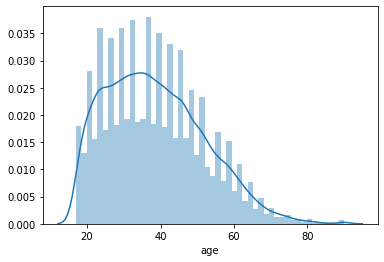

In [ ]:
sns.distplot(data['age']);

__Observation:__ The dataset conatins data of adults where most of them age is between 20-45.

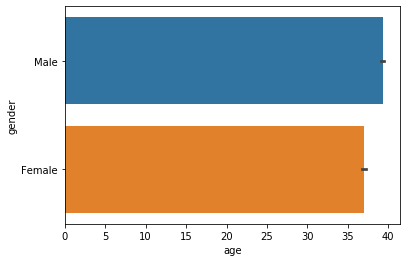

In [ ]:
sns.barplot(x='age',y='gender',data=data);

__Observation:__ There are more males compared to females in the given dataset.

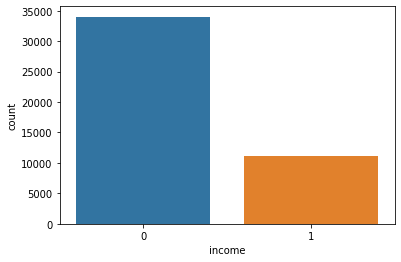

In [ ]:
sns.countplot(data['income']);

__Observation:__ There are many values in our dataset where people have income less than 50k as comapred to those whose income is greater than 50k. So, we have an imbalanced data. 

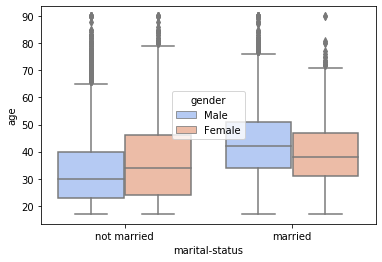

In [ ]:
sns.boxplot(x='marital-status',y='age',hue='gender',data=data,palette='coolwarm');

__Observation:__ 

Married: Both males and females are almost equal.
    
Not married: Females are more than males.

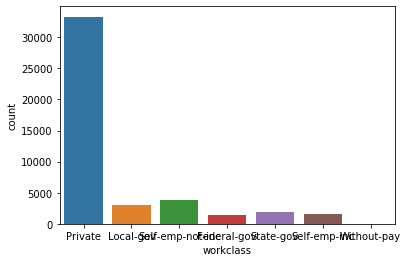

In [ ]:
sns.countplot(data['workclass']);

__Observation:__ The dataset includes high values of people who are from Private work class compared to others.

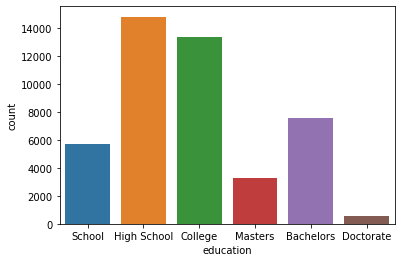

In [ ]:
sns.countplot(data['education']);

__Observation:__ A high number of people come from High School or College. Very few are highly qualified.

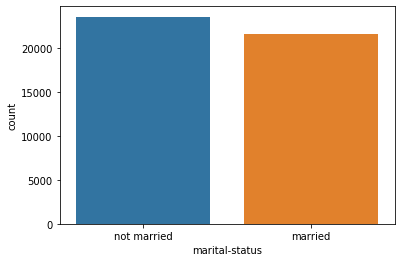

In [ ]:
sns.countplot(data['marital-status']);

__Observation:__ The dataset seems balanced in terms of people married or not.

# 5. Preparing the Data

In [ ]:
X= data.iloc[:,:-1]
y= data.iloc[:,14]

In [ ]:
categorical_data= X[['workclass','education','marital-status','occupation','relationship','race','gender','native-country']]

In [ ]:
X= X.drop(categorical_data,axis=1)
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
5,34,198693,6,0,0,30


In [ ]:
# One-hot encoding..
OHE_data=pd.get_dummies(categorical_data,drop_first=True)
OHE_data.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_College,education_Doctorate,education_High School,education_Masters,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,native-country_others
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
X= pd.concat([X,OHE_data], axis=1)
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,native-country_others
0,25,226802,7,0,0,40,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,38,89814,9,0,0,50,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,28,336951,12,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,44,160323,10,7688,0,40,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
5,34,198693,6,0,0,30,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
#splitting the test and train data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.35,random_state=0)

#Scaling the data using StandardScaler.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 6. Implementing Algorithms

## 6.a. Logistic Regression

In [ ]:
#using Linear Regression model.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred= lr.predict(X_test)

In [ ]:
outcome = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
outcome

,Actual,Predicted
44688,0,0
38106,0,0
29131,0,0
31472,1,0
45120,0,0
...,...,...
13114,0,0
16463,0,0
25302,1,1
24084,0,0


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("Accuracy is: ",float(accuracy_score(y_test,y_pred))*100,"%")

print("Classification Stats:\n",classification_report(y_test,y_pred))

Accuracy is:  84.35683598685874 %
Classification Stats:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90     11877
           1       0.73      0.60      0.66      3951

    accuracy                           0.84     15828
   macro avg       0.80      0.76      0.78     15828
weighted avg       0.84      0.84      0.84     15828



__Note:__ The accuracy achieved by Logistic Regression is 84.35% at test size = 0.35.

## 6.b. Naive Bayes

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()

# fit the model with the training data
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# predict the target on the train dataset
predict_train = model.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_train=accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.7675716132544057


In [ ]:
predict_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.7621935809957038


__Note:__ Naive Bayes gives an accuracy of 76% at test size = 0.35.

## 6.c. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=130,random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[10997   880]
 [ 1513  2438]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11877
           1       0.73      0.62      0.67      3951

    accuracy                           0.85     15828
   macro avg       0.81      0.77      0.79     15828
weighted avg       0.84      0.85      0.84     15828

0.8488122314885014


__Note:__ Random Forest gives accuracy of 84.88% with estimators=130.

## 6.d. Random Forest using PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([0.07456465, 0.05712614, 0.04792908, 0.03987949, 0.03712104,
       0.03605317, 0.03453769, 0.03374643, 0.03122601, 0.02988881,
       0.02856182, 0.02707112, 0.02678838, 0.02655919, 0.02597932,
       0.02547403, 0.0252004 , 0.02458319, 0.0241675 , 0.02391576,
       0.02385336, 0.02368873, 0.02354804, 0.02314592, 0.02303975,
       0.02295534, 0.02206681, 0.02087083, 0.02033634, 0.01999391,
       0.01790879, 0.01660291, 0.01371483, 0.01291324, 0.01285227,
       0.00792525, 0.0075336 , 0.00288562, 0.0016072 , 0.00095492,
       0.00062197, 0.00060713])

In [ ]:
pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [ ]:
explained_variance = pca.explained_variance_ratio_ 
explained_variance 

array([0.07455984, 0.05707503, 0.0474968 , 0.03925579, 0.03686167,
       0.03530891])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(max_depth=2,random_state=0)
Classifier.fit(X_train,y_train)

# Predicting the Test set results
y_pred = Classifier.predict(X_test)  


# Performance Evaluation
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

# type your code here10
cm = confusion_matrix(y_test,y_pred)
print(cm ,'\n')
print(accuracy_score(y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[11877     0]
 [ 3951     0]] 

0.7503790750568613


__Note:__ Random Forest using PCA gives an accuracy of 77.72% with components=6.

# 7. Conclusions

__On Implementing various algorithms, the accuracies are__

1.Logistic Regression - 84.35%

2.Naive Bayes - 76.21%

3.Random Forest Classifier - 84.88%

4.Random Forest Classifier using PCA - 77.72%

It can be concluded that Random Forest Classifier has outperformed all the other algorithms.

We might have got much better accuracies if:
    
    1. The data would have been balanced.
    2.There might have been more numerical values to compute to the final solution.

There was imbalance in data which was perviously shown in the Analysis Phase of this notebook.

__End of Notebook__